In [1]:
import ase
import matplotlib.pyplot as plt
from abtem.tilt import precession_tilts
from ase.io import read

import abtem

(examples:ped_quickstart)=
# PED quickstart

## Configuration

We start by (optionally) setting our configuration. See [documentation](reference:configuration) for details.

In [2]:
abtem.config.set(
    {
        "device": "cpu",
        "fft": "fftw",
        "diagnostics.task_progress": True,
        "diagnostics.progress_bar": "tqdm",
    }
)

## Atomic model

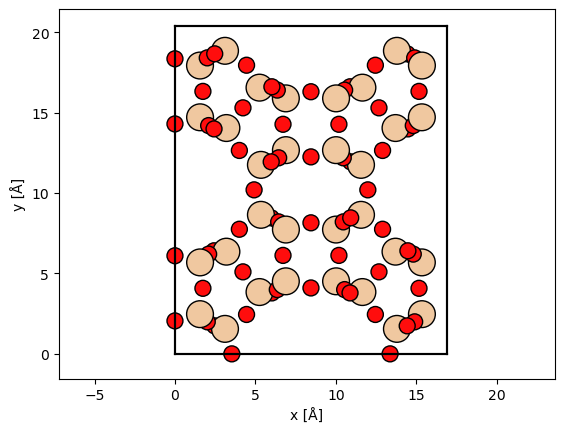

In [3]:
atoms = read("data/SiO2_zeolite.cif")

cell = atoms.cell.copy()

atoms = atoms * (1, 1, 20)

abtem.show_atoms(atoms, plane="xy");

In [4]:
frozen_phonons = abtem.FrozenPhonons(atoms, 8, sigmas=0.078)

In [5]:
potential = abtem.Potential(
    frozen_phonons,
    sampling=0.05,
    projection="infinite",
    slice_thickness=1,
)

In [6]:
wave = abtem.PlaneWave(energy=100e3)
wave.grid.match(potential)

In [7]:
wave.tilt = precession_tilts(50, 5)

In [8]:
measurement = wave.multislice(potential).diffraction_patterns().mean(0).compute()

tasks:   0%|          | 0/39 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

multislice:   0%|          | 0/525 [00:00<?, ?it/s]

In [9]:
spots = (
    measurement.crop(25)
    .block_direct()
    .index_diffraction_spots(cell=atoms)
    .remove_low_intensity(1e-3)
)

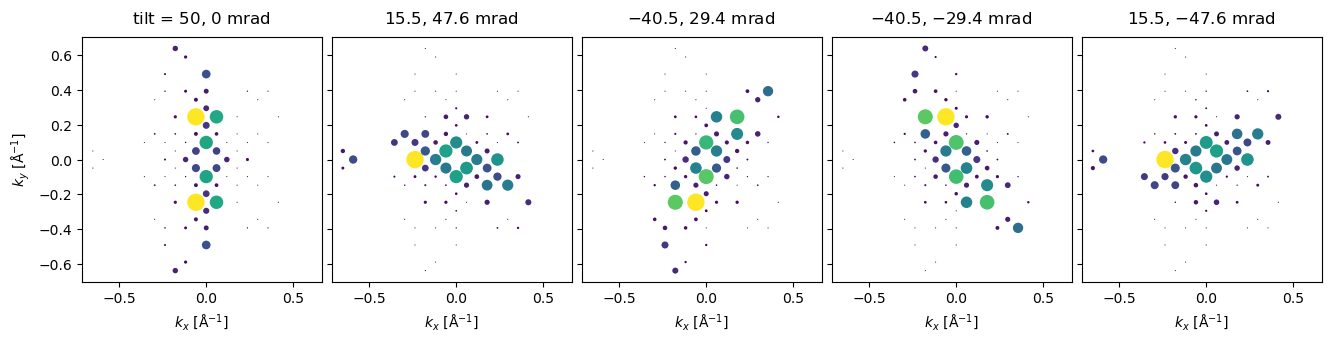

In [10]:
visualization = spots.show(
    explode=True,
    scale=.05,
    figsize=(14, 5),
    annotations=False,
    annotation_kwargs={"threshold": 1e-2},
)

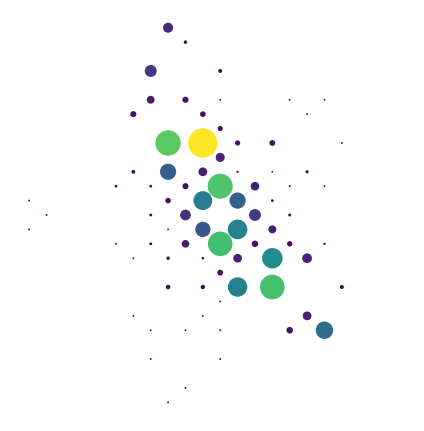

In [11]:
visualization = spots[-2].show(scale=0.05, annotations=False)
visualization.axis_off()
plt.savefig("../thumbnails/ped_quickstart.png", bbox_inches="tight", pad_inches=0)